In [43]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')

In [45]:
from tqdm import *

In [46]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.1307, 0.3081)
])

train_data = datasets.MNIST(root= './test', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root= './test', train=False, download=True, transform=transform)

In [47]:
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

In [48]:
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.net = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
    
    def forward(self, x):
        return self.net(x)

In [49]:
model = DNN().to('mps')
model

DNN(
  (net): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=512, bias=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=128, bias=True)
    (6): ReLU()
    (7): Linear(in_features=128, out_features=64, bias=True)
    (8): ReLU()
    (9): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [50]:
loss_fn = nn.CrossEntropyLoss()

In [51]:
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.5)

100%|██████████| 5/5 [00:31<00:00,  6.30s/it]


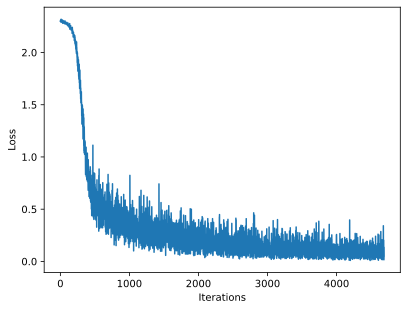

In [52]:
epochs = 5
losses = []

for epoch in trange(epochs):
    for (x, y) in train_loader:
        x, y = x.to('mps'), y.to('mps')
        pred = model(x)
        loss = loss_fn(pred, y)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

Fig = plt.figure()
plt.plot(range(len(losses)), losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()
        

In [53]:
correct = 0
total = 0

with torch.no_grad():
    for (x, y) in test_loader:
        x, y = x.to('mps'), y.to('mps')
        pred = model(x)
        _, predicted = torch.max(pred, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

print(f'Accuracy: {100 * correct / total}%')

Accuracy: 97.06%
